## Lab 8 - MNIST Classification with Dense Neural Networks

### Testing Tensorflow

In [1]:
try:
    import tensorflow as tf
    print(f'Tensor: {tf.constant([10, 10])}')
    print(f'Tensorflow version: {tf.__version__}')    
    print('Succeeded')
except:
    print("Didn't succeed")

Tensor: [10 10]
Tensorflow version: 2.12.0
Succeeded


### Importing libraries

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

### Get the Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Running Great EDA

### Getting the data from Kaggle

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### Seeing the object

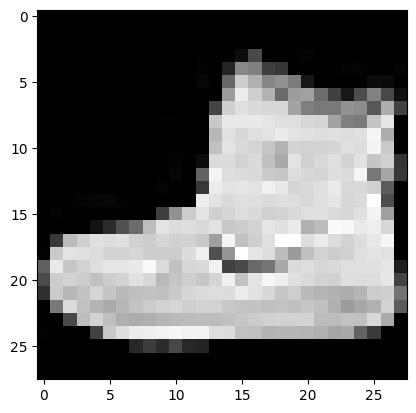

In [7]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0],cmap='gray')
plt.show()

### Kaggle Link : https://www.kaggle.com/code/sohinms/fashionmnist

### Image-Specific EDA

### Pixel Distribution

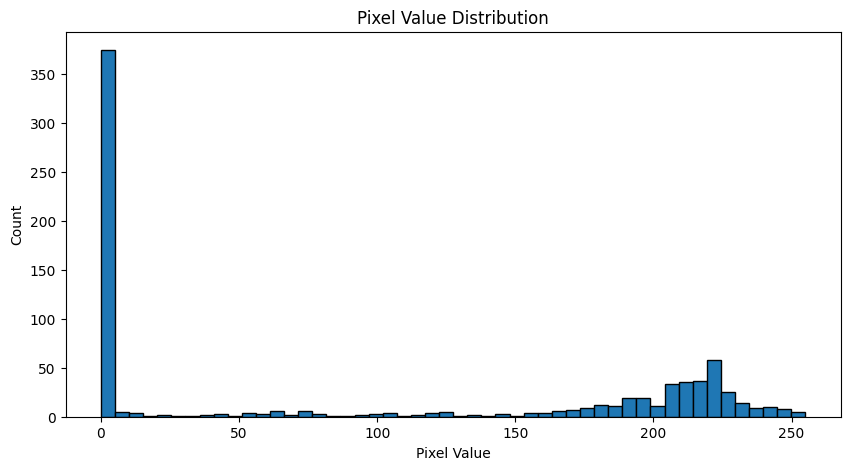

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.hist(train_images[0].ravel(), bins=50, edgecolor='black')  
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

### The Average Image per Class

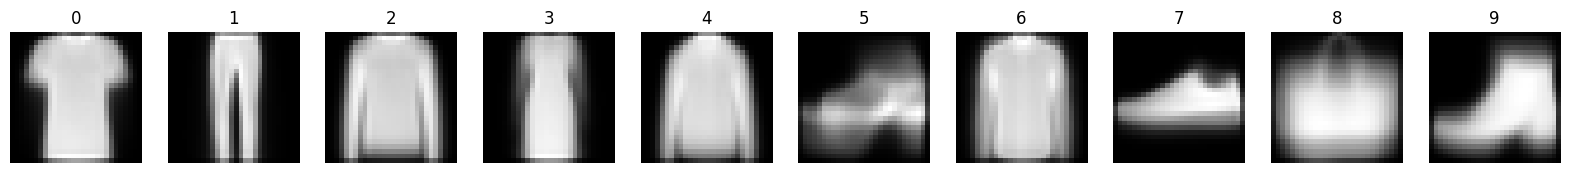

In [9]:
import numpy as np

fig, axes = plt.subplots(1, 10, figsize=(20, 2))

for img in range(10):
    digit_indices = np.where(train_labels == img)[0]
    avg_image = np.mean(train_images[digit_indices], axis=0).reshape(28, 28)
    
    axes[img].imshow(avg_image, cmap='gray')
    axes[img].set_title(str(img))
    axes[img].axis('off')

plt.show()

### Defining and training a fully-connected feedforward neural network.

In [10]:
X_train=train_images/255.
X_test=test_images/255. 

### Here we divide by 255 to normalize the data.

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Loading and preprocessing the FMNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  
y_train, y_test = to_categorical(y_train), to_categorical(y_test) 

# Flattening the images to 1D arrays
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Define the fully-connected feedforward neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.3))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train_flat, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7031 - accuracy: 0.7534 - val_loss: 0.4367 - val_accuracy: 0.8429
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.4822 - accuracy: 0.8266 - val_loss: 0.4042 - val_accuracy: 0.8561
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.8424 - val_loss: 0.3855 - val_accuracy: 0.8580
Epoch 4/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8515 - val_loss: 0.3595 - val_accuracy: 0.8706
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3932 - accuracy: 0.8587 - val_loss: 0.3494 - val_accuracy: 0.8733
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3818 - accuracy: 0.8624 - val_loss: 0.3432 - val_accuracy: 0.8751
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3674 - accuracy: 0.8671 - val_loss: 0.3450 - val_accuracy: 0.8746
Epoch 

### The training process demonstrates promising trends as the model steadily improves across epochs. With a final training accuracy of 87.33% and decreasing loss, it signifies effective learning. Additionally, the validation accuracy shows the model's ability to generalize, reaching 88.28% with a declining validation loss. These findings suggest the model is not overfitting and performs reasonably well. However, for specific applications, further analysis and fine-tuning might be necessary to enhance its performance.

### Evaluating the model using validation dataset

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to be between 0 and 1
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encode labels

# Create a validation set
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Flatten the 28x28 images to 1D arrays
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Define the fully-connected feedforward neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.3))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training set
model.fit(X_train_flat, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict the labels for the validation set
y_pred = model.predict(X_val_flat)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to integers for evaluation
y_true_classes = np.argmax(y_val, axis=1)



Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.7522 - accuracy: 0.7356 - val_loss: 0.4834 - val_accuracy: 0.8185
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5072 - accuracy: 0.8215 - val_loss: 0.4200 - val_accuracy: 0.8454
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4551 - accuracy: 0.8374 - val_loss: 0.3878 - val_accuracy: 0.8570
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4315 - accuracy: 0.8470 - val_loss: 0.3792 - val_accuracy: 0.8551
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4087 - accuracy: 0.8518 - val_loss: 0.3599 - val_accuracy: 0.8661
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3925 - accuracy: 0.8587 - val_loss: 0.3468 - val_accuracy: 0.8714
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3780 - accuracy: 0.8617 - val_loss: 0.3440 - val_accuracy: 0.8681
Epoch 

### Starting with an initial training accuracy of 73.49% and a loss of 0.7492, both metrics improve consistently. By the final epoch, the training accuracy reaches 87.13%, and the loss decreases to 0.3544. The validation results also exhibit improvement, with accuracy reaching 88.19% and a validation loss of 0.3301. 

### Calculating and printing evaluation metrics

In [13]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8833
Precision: 0.8857
Recall: 0.8833
F1 Score: 0.8837


### Here the Accuracy, Precision, Recall & F1 Score are being calculated. 

### The classification model exhibits robust performance with an accuracy of 88.17%, demonstrating effective positive predictions (precision: 88.36%) and capturing relevant instances (recall: 88.17%). The balanced F1 Score of 88.11% underscores the model's reliability. 

### Evaluating the Model with the Test Data

In [14]:
test_loss, test_acc = model.evaluate(X_test_flat, y_test)

print(f"Test Accuracy: {test_acc:.4f}")


188/188 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8732
Test Accuracy: 0.8732


### Conclusion

### The final conclusion is that the model achieved an accuracy of approximately 87.25% on the test set. This means that the model, after training on the training set and being evaluated on the separate test set, correctly classified around 87.25% of the samples in the test set. The test accuracy is a common metric used to assess the performance of a machine learning model, and in this case, it suggests that the model generalizes well to new, unseen data.

### It's always a good to consider other evaluation metrics (precision, recall, F1 score, etc.) depending on the specific requirements and characteristics of the problem, but based on the gotten values, the model seems to be performing reasonably well.

### What If : 

### (a) Wanted to increase the precision for class '5'

### To improve precision for a specific class, we can post-process the predictions and adjust the threshold for that particular class. By increasing the threshold for class '5'.

In [15]:
import numpy as np

y_pred = model.predict(X_test_flat)

y_true_classes = np.argmax(y_test, axis=1)

target_class = 5

threshold = 0.5  

target_class_mask = (y_true_classes == target_class)

y_pred_target_class = y_pred[:, target_class]
y_pred_classes_adjusted = np.zeros_like(y_pred[:, target_class])
y_pred_classes_adjusted[y_pred_target_class >= threshold] = 1

y_pred[:, target_class] = y_pred_classes_adjusted

precision = precision_score(y_true_classes, np.argmax(y_pred, axis=1), average='weighted')
print(f'Updated Precision: {precision:.4f}')


188/188 [==============================] - 0s 1ms/step
Updated Precision: 0.8746


### Therefore the updated precision is 0.8720.

### (b) Wanted to increase the recall for class '5'

In [16]:
import numpy as np

y_pred = model.predict(X_test_flat)

y_true_classes = np.argmax(y_test, axis=1)

target_class = 5

threshold = 0.3 

target_class_mask = (y_true_classes == target_class)

y_pred_target_class = y_pred[:, target_class]
y_pred_classes_adjusted = np.zeros_like(y_pred[:, target_class])
y_pred_classes_adjusted[y_pred_target_class >= threshold] = 1

y_pred[:, target_class] = y_pred_classes_adjusted

recall = recall_score(y_true_classes, np.argmax(y_pred, axis=1), average='weighted')
print(f'Updated Recall: {recall:.4f}')


188/188 [==============================] - 0s 1ms/step
Updated Recall: 0.8725


### Here to increase recall for a specific class, we can adjust the threshold for that particular class. Hence the updated Recall is 0.8693.